In [65]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import cv2
import os

In [66]:
ROOT_DATASET_DIR = "isic-2024-challenge"
image_path=os.path.join(ROOT_DATASET_DIR,"train-image","image")
file_name = os.path.join(ROOT_DATASET_DIR,"train-metadata.csv")
df_raw = pd.read_csv(file_name)

C:\Users\ssre_\AppData\Local\Temp\ipykernel_6584\3051045247.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(file_name)


In [67]:
df_raw.head(10)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
5,ISIC_0035502,0,IP_3026693,75.0,female,head/neck,2.54,TBP tile: close-up,3D: white,22.129183,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.619603
6,ISIC_0051648,0,IP_0218255,65.0,male,upper extremity,3.74,TBP tile: close-up,3D: XP,14.319188,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.918133
7,ISIC_0051665,0,IP_7734648,50.0,male,posterior torso,4.31,TBP tile: close-up,3D: XP,20.102610,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.972390
8,ISIC_0051710,0,IP_1307115,50.0,male,anterior torso,3.17,TBP tile: close-up,3D: white,14.166805,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.818963
9,ISIC_0051758,0,IP_2180091,60.0,female,upper extremity,3.97,TBP tile: close-up,3D: XP,16.251490,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999690


In [68]:
df_raw.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [69]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

target
0    400666
1       393
Name: count, dtype: int64


<Axes: title={'center': 'Target'}, xlabel='target', ylabel='count'>

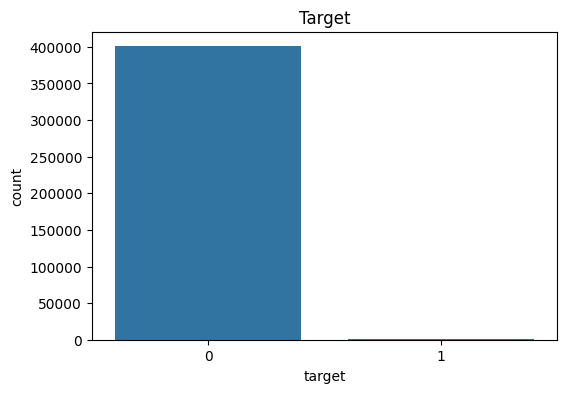

In [75]:
# Analyze imbalancing
targets = df_raw.target.value_counts()
print(targets)

# Plotting the target variable: moderately imbalanced, but not critical
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Target')
sns.countplot(x=df_raw['target'])

In [71]:
def get_shape(file_name):
    im = cv2.imread(file_name)
    if im is not None:
        return im.shape
    else:
        return None

df_raw['im_size'] = df_raw['isic_id'].apply(lambda x: get_shape(os.path.join(image_path, x + ".jpg")))

In [72]:
df_raw['im_size'].value_counts()

im_size
(133, 133, 3)    21049
(131, 131, 3)    20906
(129, 129, 3)    20379
(135, 135, 3)    20364
(127, 127, 3)    19256
                 ...  
(47, 47, 3)          2
(41, 41, 3)          1
(261, 261, 3)        1
(269, 269, 3)        1
(255, 255, 3)        1
Name: count, Length: 111, dtype: int64

In [73]:
df_malign = df_raw[df_raw.target == 1]

In [74]:
df_malign.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,393.0,390.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,...,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,63.000000,393.000000
mean,1.0,61.371795,5.749771,22.500924,17.534401,23.837896,24.950406,33.067349,30.796881,46.741528,...,1.613218,3.418305,2.758215,0.317134,87.786260,-19.793436,1169.483517,33.644145,0.670952,81.431493
std,0.0,11.932877,3.902299,6.028313,4.994446,5.796078,4.496718,7.139618,5.162160,7.649197,...,1.402347,2.547976,1.272302,0.136708,53.357287,175.384598,434.909694,94.172638,0.792798,33.805649
min,1.0,20.000000,1.010000,4.971736,4.826737,2.870907,12.637140,7.715667,17.381603,7.174666,...,0.000000,0.490105,1.112039,0.076033,0.000000,-499.481934,25.816711,-218.200900,0.200000,0.000002
25%,1.0,55.000000,2.400000,18.829265,14.102340,20.117431,21.941560,28.885180,27.151434,41.682590,...,0.257916,1.441946,2.069338,0.209040,40.000000,-120.321200,1069.546000,-35.567630,0.300000,83.221790
50%,1.0,60.000000,5.140000,21.990980,16.877089,24.043740,25.077617,33.446362,31.005119,47.277889,...,1.475259,2.724339,2.534622,0.303571,90.000000,-22.899292,1286.181000,35.604858,0.400000,99.684890
75%,1.0,70.000000,7.870000,25.872050,20.416961,27.808540,27.976310,37.535360,34.245000,52.122260,...,2.414190,4.635533,3.032155,0.400000,135.000000,75.480410,1477.038086,110.856689,0.600000,99.995804
max,1.0,85.000000,18.940000,43.717670,35.867190,44.625461,42.718264,53.569388,47.263349,65.258690,...,7.020391,14.004394,15.733160,0.767033,175.000000,467.847500,1864.878662,220.518600,5.000000,100.000000


In [79]:
df_raw.isna().sum()

isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

In [80]:
df_malign.isna().sum()

isic_id                           0
target                            0
patient_id                        0
age_approx                        3
sex                              10
anatom_site_general               0
clin_size_long_diam_mm            0
image_type                        0
tbp_tile_type                     0
tbp_lv_A                          0
tbp_lv_Aext                       0
tbp_lv_B                          0
tbp_lv_Bext                       0
tbp_lv_C                          0
tbp_lv_Cext                       0
tbp_lv_H                          0
tbp_lv_Hext                       0
tbp_lv_L                          0
tbp_lv_Lext                       0
tbp_lv_areaMM2                    0
tbp_lv_area_perim_ratio           0
tbp_lv_color_std_mean             0
tbp_lv_deltaA                     0
tbp_lv_deltaB                     0
tbp_lv_deltaL                     0
tbp_lv_deltaLB                    0
tbp_lv_deltaLBnorm                0
tbp_lv_eccentricity         

All images labeled as malign have a lesson_id, iddx_1, iddx_2, iddx_3. Half of them has iddx_4